# <u> Information: Machine Learning  </u>

Machine learning (ML) is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers learn automatically without human intervention or assistance and adjust actions accordingly.

Machine learning algorithms are often categorized as _supervised_ or _unsupervised_:

- _Supervised learning_ is a machine learning approach defined by its use of labeled datasets. These datasets are designed to train or supervise algorithms into classifying data or predicting outcomes accurately. Using labeled inputs and outputs, the model can measure its accuracy and learn over time.

- _Unsupervised learning_ uses machine learning algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns in data without the need for human intervention.
 
In this tutorial, we will focus on supervised learning algorithm. Specifically, the Linear Regression model, which is used to _predict_ a certain feature/attribute.

## What we cover in this subject
<b>Classification predictive modeling </b> is the task of approximating a mapping function (`f`) from input variables (`X`) to discrete output variables (`y`).The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation. For example, an email of text can be classified as belonging to one of two classes: `"spam"` and `"not spam"`.

<b>Regression predictive modeling </b> is the task of approximating a mapping function (`f`) from input variables (`X`) to a continuous output variable (`y`). A continuous output variable is a real-value, such as an integer or floating point value. These are often quantities, such as amounts and sizes. For example, a house may be predicted to sell for a specific dollar value (e.g., `200,000`).

## Basic tasks in training a supervised ML model
Training a ML model is both science and art, in the sense that there is no step-by-step formula to create the best model for any datasets. However, there are a few basic tasks that are involved in almost any ML modelling workflow, including:

1. Set up your experimental design (e.g., create train and test set(s) with hold-out, k-fold cross validation, bootstrapping,...) 
2. Preprocess your train set and apply the same preprocessing parameters on your test set
3. Choose an appropriate ML algorithm and instantiate it with some hyperparameters
4. Fit the ML instance with the train set
5. Perform prediction on the test set
6. Evaluate the predicted results with the ground truths with appropriate metric(s) corresponding to the chosen experiment design
7. Repeat step 3 to 6 with different sets of hyperparameters to tune them (optional)

We will introduce each concept in this workflow separately, over the course of this workshop and the next one. We will begin with the introduction of classification algorithms ($k$-NN and Decision Tree) and linear regression algorithm.

## Case Study Background
As the volume of transactions increases, your manager wants to liaise the predictive power of machine learning to make further adjustments to the booking system. Towards this end, your manager  wants you to investigate how different attributes can be used for classification and regression task to draw interesting insights regarding the movie booking system.


### About the dataset

Each row in this dataset captures a customer booking:
- `unit_price`: is the price per ticket
- `quantity`: is the number of tickets in that booking
- `time_on_site`: is the amount of seconds it takes between the customer first logged onto the site and when they finished placing the booking
- `movie_rating`: is the average customer rating of that movie (at the time of the booking)
- `label`: is the company's internal classification of that booking. 
    - `Low` if they booked <= 5 tickets; 
    - `Medium` if they booked between 6 and 10 tickets; 
    - and `High` if the purchase was more than 10 tickets.
- `total` column that is the paid amount (\$) including any fees.


### Workshop Overview

Using appropriate machine learning techniques, investigate the following questions:
- Using sklearn library function, predict the rating of different movies in the dataset.
- Draw and discuss the residual plot of the regression build for predicting movie rating.
- Use the sklearn library function, classify the booking level of the movies in `low`, `medium` and `high` using KNN algorithm.
- Using information gain criteria, find the attribute used to split the tree decision tree on?
- Use the sklearn library function, classify the booking level of the movies in `low`, `medium` and `high` using decision tree classifier.



## Learning objectives

- Understand how KNN algorithm works
- Know how to use confusion matrix and accuracy as evaluation metrics for multi-class problems
- Know how to select the best attribute used to split the desision tree using information gain criteria
- Understand how descision trees work and are visualised
- Know how to predict numerical data attribute using linear regression model
- Interpret the coefficients of a linear regression model
- Plot and interpret residual plots
- Know how to write a basic ML training pipeline using `scikit-learn` library in Python
- Understand how holdout (train-test split) is implemented in `scikit-learn`


# <u>Concept: $k$-Nearest Neighbours ($k$-NN)</u>
The $k$-NN algorithm works under the assumption that _similar things exist in close proximity_. That is, similar things are near to each other (not to be confused with $k$-means).

Generally, the $k$-NN algorithm has the following pseudocode

```python
k = chosen number of neighbours
for each example in the data:
    calculate the distance between the query example and the current example from the data.
    add the distance and the index of the example to an ordered collection
    
sort the ordered collection of distances and indices from smallest to largest in ascending order
pick the first k entries from the sorted collection
get the labels of the selected K entries

return the labels of the selected entries
```

**Notes:** $k$-means and $k$-NN are used for different problems:
- $k$-means clustering is unsupervised that looks to gather and group data into $k$ number of clusters by looking at the data points only;
- whilst $k$-NN is a supervised classifier that will classify new data points according to the $k$ nearest data points (that were given in the train dataset). 

## $k$-NN via `sklearn`
Now, we will build $k$-NN model to classify the movie bookings using [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html ). Our categories will be:
- Low
- Medium
- High

We will also use the same `X` features as last weeks' Linear Regression example.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [64]:
train = pd.read_csv('supervised_train.csv')
test = pd.read_csv('supervised_test.csv')

In [65]:
X_COLS = ['unit_price', 'time_on_site', 'movie_rating']
y_COL = 'label'

In [66]:
# create design matrix X and predictions y
# split into train and test 
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

In [67]:
# sample 10 random rows as an example
train.sample(10)

,unit_price,time_on_site,quantity,total,label,movie_rating
4828,25,135.857499,8,219.78,High,5.015004
7855,25,104.579375,5,144.34,Low,9.128276
6470,25,134.321810,7,189.26,Medium,5.397747
4249,25,104.566029,6,156.56,Medium,6.278077
5715,25,104.096119,2,85.19,Low,7.523449
868,25,157.905011,6,167.06,Medium,6.519464
778,25,182.130194,6,165.27,Medium,5.754451
7413,25,104.479646,5,144.83,Low,8.733501
2686,25,138.712507,5,142.15,Low,6.825263
7261,25,102.940315,1,51.04,Low,7.904293


In [68]:
# Create and fit knn with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit to the train dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluating $k$-NN
### Evaluation Metrics
Evaluation is an important step in training ML models, similar to how examinations are used to assess how much someone has "learned". We will cover the testing procedure (i.e., validation) in more details later. To do so, we would need an appropriate metric to evaluate each type of model.

For classifiers like $k$-NN, we normally calculate accuracy, precision, and recall. Note that there are sub-types of these metrics, depending on how many classes we have in the target variable (binary classification vs multi-label/multi-class classification). 

The first step to calculate accuracy, precision, and recall, is to construct the Confusion Matrix.

### Confusion Matrix
The Confusion Matrix is a performance metric for classification problems. It is a table that shows the number of predicted classes vs actual classes. 

![Example Confusion Matrix](https://miro.medium.com/max/490/1*Z54JgbS4DUwWSknhDCvNTQ.png)


If your classification model is good, then you would expect the diagonals to be higher in number.

The True Positive (TP), False Positive (FP), True Negative (TN), and False Negatives (FN) are the same as discussed in the Data Linkage workshop.

#### `sklearn` Code Notes
The `plot_confusion_matrix` from `sklearn.metrics` function will be deprecated. Please refer to the new methods: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
# Note that we're calculating the accuracy score for the test data
y_pred = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.8215


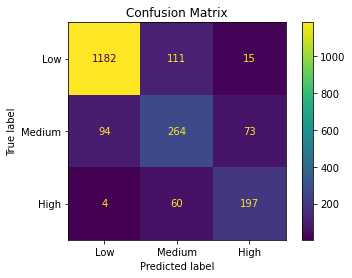

In [71]:
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred, # predictions
                      labels=['Low', 'Medium', 'High'] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=['Low', 'Medium', 'High'] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

<blockquote style="padding: 10px; background-color: #ebf5fb;">

## Class Discussion Question 1
1. Does our $k$-NN model perform well? Justify your answer(s).
2. Using the values from the multi-class confusion matrix, show all calculations to confirm that the accuracy of this model is indeed `0.8215` (refer to the formulas in the lecture slides). Is this a subset accuracy or average accuracy? What is the difference between these 2 types of accuracy?
3. Would you consider our $k$-NN model to be robust? If so, why?

# <u> Concept: Decision Tree Classifiers (DT) </u>
A Decision Tree model works by splitting nodes into sub-nodes based on attributes to classify a data point. This process is performed multiple times during the training process and terminates when only homogenous nodes are left. Therefore, node splitting is a key concept to be aware of.

Node splitting is the process of dividing a node into multiple sub-nodes to create relatively pure nodes. Although trees usually use Gini as a split criterion, we will use the more familiar Entropy method for this example.

## Information Gain (IG)
Information Gain is very similar to Mutual Information (MI) aside from a few small differences. The key difference is that MI works between _two attributes_ whereas IG is used between _one attribute against a class label_.

Recall the MI formula (which was covered in the Correlation workshop and is examinable):

$$
\text{MI}(X, Y) = H(X) – H(X | Y) = H(Y) - H(Y | X)
$$

IG on the other hand is the exact same, but we use `y` to specify that wew are using a class label:  

$$
\text{IG}(X, y) = H(X) – H(X | y) = H(y) - H(y | X)
$$

Like MI, the higher the value, the greater the entropy gained. For IG, we want _more_ information to be gained, hence, it is called _Information Gain_ (go figure).

<blockquote style="padding: 10px; background-color: #FFD392;">
    
## Individual Exercise 1 (By Hand)
Let's consider the following dataset for a binary class problem:
    
| time_on_site | movie_rating  | label  |
|--------------|---------------|--------|
| Long         | Above Average | low    |
| Long         | Below Average | low    |
| Long         | Below Average | low    |
| Long         | Above Average | medium |
| Long         | Below Average | low    |
| Short        | Above Average | medium |
| Short        | Above Average | medium |
| Short        | Above Average | medium |
| Long         | Below Average | medium |
| Long         | Above Average | medium |

For the following questions, we want to select the feature that has the most information gain to use for our Decision Tree.

Do the following questions by hand (without code):
1. Compute the Information Gain when splitting on `HighSales`.
2. Compute the Information Gain when splitting on `HasSequel`.
3. Which feature would the Decision Tree choose?

Now, let's try doing this from first principles before using `sklearn`.

In [72]:
data = pd.read_csv('dtc.csv')
data

,time_on_site,movie_rating,label
0,Long,Above Average,low
1,Long,Below Average,low
2,Long,Below Average,low
3,Long,Above Average,medium
4,Long,Below Average,low
5,Short,Above Average,medium
6,Short,Above Average,medium
7,Short,Above Average,medium
8,Long,Below Average,medium
9,Long,Above Average,medium


Define our entropy functions (similar to the functions from the Correlation workshop).

In [73]:
import numpy as np

def compute_probability(col):
    """
    Compute the probability of a certain event
    """
    return col.value_counts() / col.shape[0]

def compute_entropy(col):
    """
    Compute the entropy of a certain event
    """
    probabilities = compute_probability(col)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

def compute_conditional_entropy(x, y):
    """
    Compute the conditional entropy between two random variables.
    Specifically, the conditional entropy of Y given X.
    """
    probability_x = compute_probability(x)
    
    temp_df = pd.DataFrame({'X': x, 'Y': y})
    
    conditional_entropy = 0
    
    # for unique event x_i
    for x_i in x.unique():
        # get the data for Y given X=x_i
        y_given_x = temp_df.loc[temp_df['X'] == x_i, 'Y']
        
        # compute the conditional entropy
        conditional_entropy += probability_x[x_i] * compute_entropy(y_given_x)
    
    return conditional_entropy

def compute_information_gain(x, y):
    """
    Compute the information gain between an attribute and class label
    """
    return compute_entropy(y) - compute_conditional_entropy(x, y)

In [74]:
for feature in ('time_on_site', 'movie_rating'):
    print(feature, compute_information_gain(data[feature], data['label']).round(4))

time_on_site 0.2813
movie_rating 0.2564


<blockquote style="padding: 10px; background-color: #ebf5fb;">


## Class Discussion Question 2
Based on the obtained information gain, which attribute do we perform the first split on? Why?

## DT via `sklearn`
Let's now use `sklearn` to classify the movie booking using the `DecisionTreeClassifier` function from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Since our dataset is _ordinal_ (categories with order), we will need to encode it first.

In [75]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [76]:
X = OrdinalEncoder().fit_transform(data[['time_on_site', 'movie_rating']])
# data['label'].to_numpy().reshape(-1,1) also works
y = OrdinalEncoder().fit_transform(data[['label']])
print(X)
print(y)

[[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [77]:
dt = DecisionTreeClassifier(criterion='entropy' # we specify entropy for IG
                           )
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

The great thing about DT is the ability to visualize it!

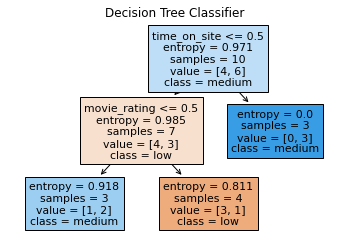

In [78]:
plot_tree(dt, # the DT classifier
          feature_names=['time_on_site', 'movie_rating'], # feature names
          class_names=['low', 'medium'], # class labels
          filled=True # fill in the rectangles
         )

plt.title("Decision Tree Classifier")

plt.show()

You may refer to this thread for more information on how to _read_ the output: https://stackoverflow.com/questions/47503575/what-do-the-values-that-graphviz-renders-inside-each-node-of-a-decision-tree-m

<blockquote style="padding: 10px; background-color: #FFD392;">
    
## Individual Exercise 2
Fit a new DT using the `train` and `test` datasets with the following features:
- `unit_price`
- `time_on_site`
- `movie_rating`

Once you have fitted the model, calculate the accuracy. You should expect the accuracy to be around `0.86` if done correctly.

In [79]:
### ANSWER HERE
FEATURE_COLS = ['unit_price', 'time_on_site', 'movie_rating']
LABEL = 'label'

X_train = train[FEATURE_COLS]
y_train = train[LABEL]
X_test = test[FEATURE_COLS]
y_test = test[LABEL]

dt2 = DecisionTreeClassifier(criterion=...)

In [80]:
### SOLUTION
FEATURE_COLS = ['unit_price', 'time_on_site', 'movie_rating']
LABEL = 'label'

X_train = train[FEATURE_COLS]
y_train = train[LABEL]
X_test = test[FEATURE_COLS]
y_test = test[LABEL]

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)

accuracy = dt2.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.862


# <u> Concept: Linear Regression </u>

## Linear Regression via `sklearn`

Linear regression is a linear model - that is, a model that assumes a **linear relationship** between the input variables (`X`) and the single continuous output variable (`y`). More specifically, that `y` can be calculated from a linear combination of the input variables (`X`). For example, a simple regression with features $x_1$, $x_2$, $x_3$, ... will have the form:  

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + ...
$$

The model "learns" $\beta_0$, $\beta_1$, $\beta_2$, ..., which are the coefficients of the linear relationship. How these coefficients are calculated are explained in the lecture slides.

The following code uses https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [81]:
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [82]:
train = pd.read_csv('supervised_train.csv')
test = pd.read_csv('supervised_test.csv')

# sample 10 random rows as an example
train.sample(10)

,unit_price,time_on_site,quantity,total,label,movie_rating
4539,20,179.194414,3,91.71,Low,8.041855
7553,25,101.456914,4,126.02,Low,6.489604
2153,25,120.373047,9,242.42,High,4.663564
6291,20,96.229692,4,113.46,Low,6.568695
700,25,130.853684,3,101.02,Low,7.424286
617,20,131.537827,5,116.15,Low,6.470998
1589,25,71.032004,1,48.60,Low,7.506287
5427,25,128.885423,6,162.53,Medium,6.199286
5245,20,69.595810,1,22.03,Low,7.626425
6465,25,163.338350,6,167.31,Medium,5.826198


Let's predict the `total` value given the `unit_price`, `time_on_site`, and `movie_rating`.

In [83]:
X_COLS = ['unit_price', 'time_on_site', 'movie_rating']
y_COL = 'total'

# create design matrix X and predictions y
# split into train and test 
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

In [84]:
X_train.head()

,unit_price,time_on_site,movie_rating
0,25,171.953089,5.103739
1,20,90.331031,6.357484
2,25,150.916902,8.122554
3,20,84.796902,6.485388
4,25,108.083701,7.884009


In [85]:
y_train.head()

0    198.26
1    120.28
2     51.72
3    112.85
4     51.17
Name: total, dtype: float64

In [86]:
# Create and fit the linear model
# lm = Linear Model (variable name)
lm = LinearRegression()

# Fit to the train dataset
lm.fit(X_train, y_train)

LinearRegression()

## Evaluating a Model

### Evaluation Metrics
- `mean_squared_error` (MSE) is a very common metric for evaluating our models' performance. As the name suggests, it calculates the average error squared and is commonly used to compare two different regression models. MSE by itself is arguably useless on its own.
- `r2_score` (R$^2$) is another metric for evaluating the models performance. It's used to explain how much variance is explained by the model divided by the total variance available in the dataset. There are different variations of $R^2$, but our definition will use $R^2 = 1 - \frac{\text{SS}_\text{RES}}{\text{SS}_\text{TOT}}$.

These are two of the more basic evaluation metrics. There are a plethora of better alternatives which you will learn if you take MAST30025.

**Summary:**  
- MSE: The lower the better when comparing models
- R2: Commonly between 0 and 1, where a higher R2 indicates a better fit. If you have negative R2, it means your model introduces _more variance_ than exists in the original dataset.

In [87]:
# alpha = intercept parameter (aka beta0)
alpha = lm.intercept_

# betas = coefficients
betas = lm.coef_

In [88]:
print('Intercept', alpha)
print('Coefficients', betas)

Intercept 202.15458420494153
Coefficients [  4.82552245   0.3604503  -35.33904917]


In [89]:
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R2', r2)
print('MSE', mse)

R2 0.7272575085095103
MSE 827.6666536786277


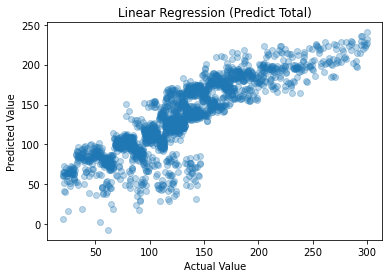

In [90]:
plt.scatter(y_test, y_pred, alpha=0.3)

plt.title('Linear Regression (Predict Total)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.show()

<blockquote style="padding: 10px; background-color: #ebf5fb;">

## Class Discussion Question
    
How would you interpret the $R^2$ and MSE values?

## Interpreting a Models' Fit

### Residuals
The residual is defined as the difference between the _observed data point_ and the _predicted data point_ using a prediction equation. You can think of it as the _distance_ between your actual value vs your predicted value.

If the true data point is above the predicted value, the residual is positive. If the true data point is below, then the residual is negative. If the true data point is the same then the residual is zero. Ideally, this means we want residuals _close to 0_ which is the same as minimizing the errors made. 

### Residual Plots
A residual plot is a type of scatter plot where the x-axis represents the input variable(s) of the data, and the y-axis represents the residual values. 

If the points on the residual plot don't seem to have any pattern to them, then the model is a good fit for the data. A pattern to the residual plot can give you and idea of what might be wrong with your model. For example, it may show obvious outliers in the data, or that there is a pattern to the data so that the model does not really fit the data well.

### Interpreting Residual Plots
1. Do the points have large residuals (differences between true and estimated)?
    - _We want small residuals that are close to 0 (think minimizing the distance/errors)._
1. Is there a trend or bias in the residuals (i.e does the residuals look evenly spread and flat)?
    - _We don't want any bias or trend._
1. Is there a pattern or correlation in the residuals (i.e is there some kind of relationship in the residuals)?
    - _We don't want any correlation._
    
Lets draw the residual plot of the regression model we have built

In [91]:
# subtract the predicted values from the observed values
residuals = y_test - y_pred

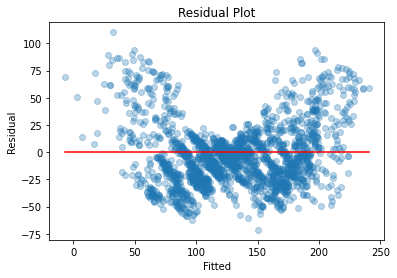

In [92]:
# plot residuals
plt.scatter(y_pred, residuals, alpha=0.3)

# plot the 0 line (we want our residuals close to 0)
plt.plot([min(y_pred), max(y_pred)], [0,0], color='red')

plt.title('Residual Plot')
plt.xlabel('Fitted')
plt.ylabel('Residual')

plt.show()

<blockquote style="padding: 10px; background-color: #FFD392;">
    
## Individual Exercise 1
- Fit a new model `lm2` which adds `quantity` as a new feature. 
- Re-train the model and compare the `mse` and `r2` with the original `lm` model.
- Plot the residual plot and analyze it. Is the new linear model a good/better fit?

Original `lm` evaluation metrics:  

```
R2 0.7272575085095103
MSE 827.6666536786277
```

In [93]:
### ANSWER HERE
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

lm2 = ...

R2 0.9653056648214418
MSE 105.28372070636198


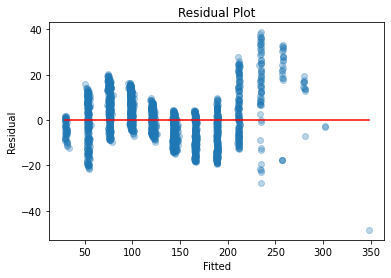

In [94]:
### SOLUTION
# create new X and y matrix
X_train = train[X_COLS + ['quantity']]
y_train = train[y_COL]
X_test = test[X_COLS + ['quantity']]
y_test = test[y_COL]

# fit lm2 
lm2 = LinearRegression()
lm.fit(X_train, y_train)

# evaluate model
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R2', r2)
print('MSE', mse)

# plot residuals
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.3)
plt.plot([min(y_pred), max(y_pred)], [0,0], color='red')

plt.title('Residual Plot')
plt.xlabel('Fitted')
plt.ylabel('Residual')

plt.show()

<blockquote style="padding: 10px; background-color: #fef5e7;">

# Challenge Questions

- Does normalizing data make a difference to classification performance?
- Build a linear regression model to predict the **purchase quantity** and check the residual plot. What do you notice? Which techniques can we use to improve performance on an integer target?
- How would a KNN Classifier for the `dtc.csv` dataset work? What would be an appropriate distance metric?
- A customer tends to spend approximately 2 minutes on the site before booking at concession price (20 dollars). Assuming that they only book at exact hours (10AM, 11AM, 12PM, etc...), predict the time they are most likely to spend the most/least amount of money on movie tickets using your chosen ML algorithm(s) (this will inform marketing to run targeted campaign around this hour to maximise customer spend - a machine learning-driven optimisation)